<a href="https://colab.research.google.com/github/Yugsolanki/ML-SC-Lab/blob/main/Genetic_Algorithm_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 3.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from deap import base, creator, tools, algorithms
import random

# 1. Genetic Algorithm Implementation

In [3]:
# Define the problem: Optimize f(x) = x^2 + 5 (finding the minimum)
def evaluate(individual):
    return individual[0]**2 + 5,

In [4]:
# Set up the genetic algorithm
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

toolbox = base.Toolbox()
toolbox.register("attr_float", random.uniform, -10, 10)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_float, n=1)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

toolbox.register("evaluate", evaluate)
toolbox.register("mate", tools.cxBlend, alpha=0.5)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [5]:
# Run the genetic algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)

pop, logbook = algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=100, stats=stats, halloffame=hof, verbose=True)

gen	nevals	avg    	min    	max    
0  	50    	39.8334	5.09094	101.707
1  	41    	9.92394	5.00102	33.3822
2  	40    	6.11216	5.00016	16.4545
3  	34    	5.24146	5.00001	6.74089
4  	47    	5.02396	5      	5.3989 
5  	32    	5.09421	5      	9.59847
6  	44    	5.01231	5      	5.59976
7  	36    	5.04492	5      	6.66804
8  	40    	5.04693	5      	7.30208
9  	43    	5.02804	5      	5.8328 
10 	43    	5.01633	5      	5.81646
11 	31    	5.03118	5      	6.55893
12 	46    	5.00508	5      	5.24614
13 	37    	5.0338 	5      	6.68989
14 	45    	5.06404	5      	7.81116
15 	36    	5.05949	5      	7.97441
16 	38    	5.04305	5      	7.15248
17 	40    	5.10803	5      	9.15472
18 	35    	5.06719	5      	7.03345
19 	35    	5      	5      	5      
20 	42    	5.0161 	5      	5.80479
21 	39    	5.04837	5      	6.95494
22 	40    	5      	5      	5      
23 	48    	5.03216	5      	6.08719
24 	38    	5.0555 	5      	6.38709
25 	44    	5.00026	5      	5.01296
26 	39    	5.002  	5      	5.09992
27 	37    	5      	5

# 2. Visualization

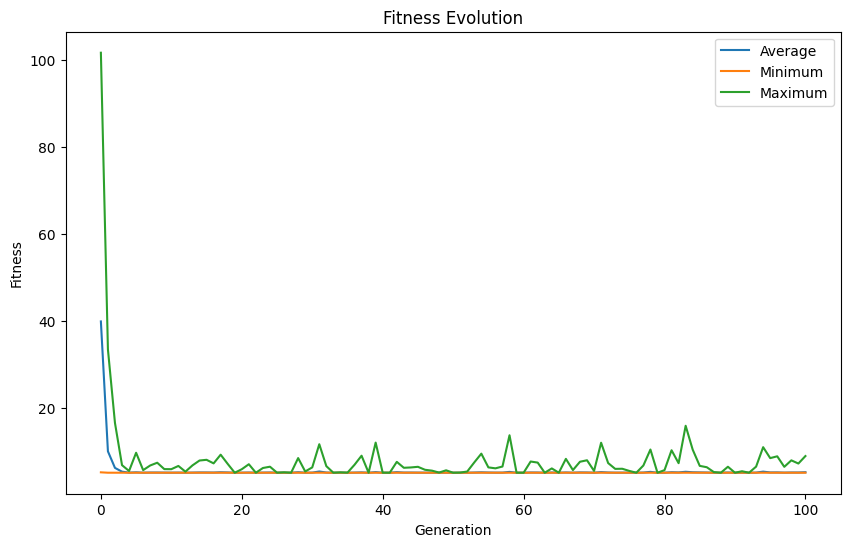

In [6]:
# Plot the fitness evolution
gen, avg, min_, max_ = logbook.select("gen", "avg", "min", "max")
plt.figure(figsize=(10, 6))
plt.plot(gen, avg, label="Average")
plt.plot(gen, min_, label="Minimum")
plt.plot(gen, max_, label="Maximum")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.legend(loc="upper right")
plt.title("Fitness Evolution")
plt.show()

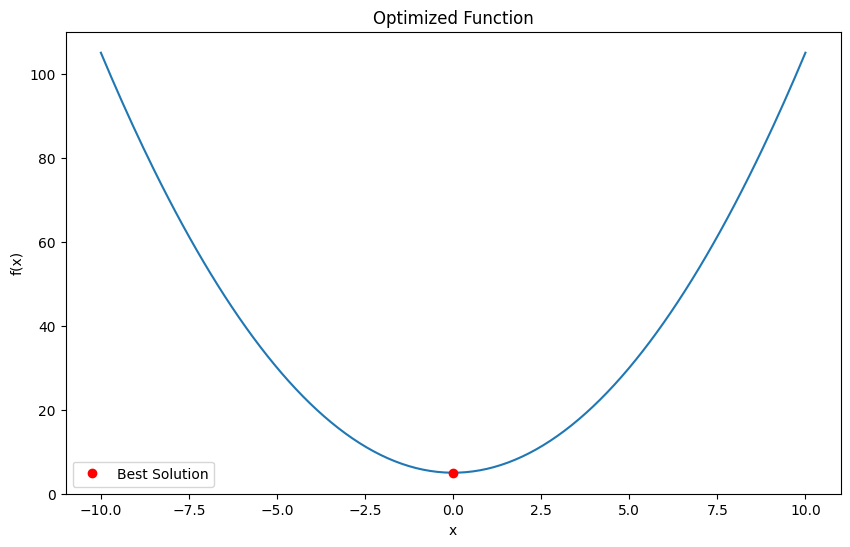

In [7]:
# Plot the final solution
x = np.linspace(-10, 10, 200)
y = x**2 + 5
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.plot(hof[0][0], hof[0].fitness.values[0], 'ro', label="Best Solution")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Optimized Function")
plt.legend()
plt.show()


# 3. Data Analysis

In [8]:
# Analyze the population diversity
final_pop = np.array([ind[0] for ind in pop])
pop_mean = np.mean(final_pop)
pop_std = np.std(final_pop)
pop_min = np.min(final_pop)
pop_max = np.max(final_pop)

print("\nPopulation Analysis:")
print(f"Mean: {pop_mean:.4f}")
print(f"Standard Deviation: {pop_std:.4f}")
print(f"Minimum: {pop_min:.4f}")
print(f"Maximum: {pop_max:.4f}")


Population Analysis:
Mean: -0.0065
Standard Deviation: 0.3369
Minimum: -1.9590
Maximum: 1.3200


# 4. Correlation Analysis

In [9]:
# Calculate correlation between individual's position and fitness
positions = np.array([ind[0] for ind in pop])
fitnesses = np.array([ind.fitness.values[0] for ind in pop])
correlation = np.corrcoef(positions, fitnesses)[0, 1]

print("\nCorrelation Analysis:")
print(f"Correlation between position and fitness: {correlation:.4f}")


Correlation Analysis:
Correlation between position and fitness: -0.5223


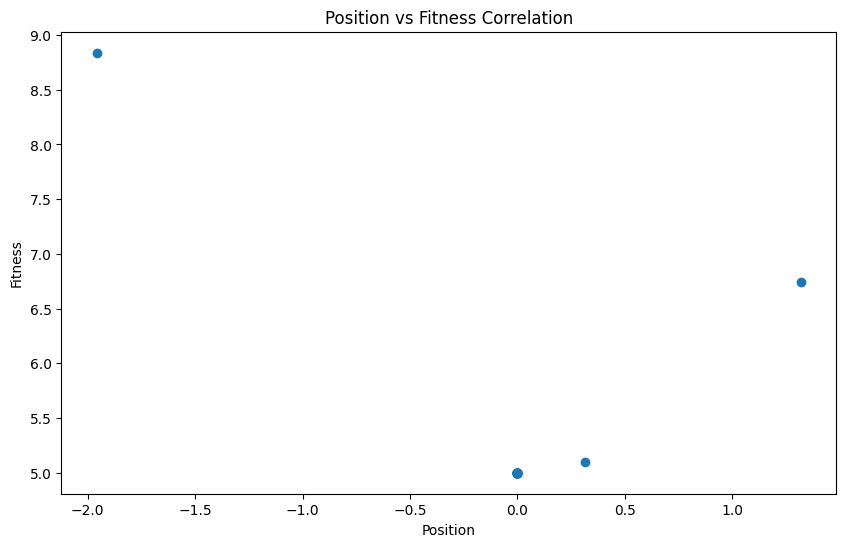

In [10]:
# Visualize the correlation
plt.figure(figsize=(10, 6))
plt.scatter(positions, fitnesses)
plt.xlabel("Position")
plt.ylabel("Fitness")
plt.title("Position vs Fitness Correlation")
plt.show()